In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import utility_functions as fn

In [3]:
# import preprocessed energy and weather data
energy = pd.read_csv('data/elec_clean.csv',index_col=0)
energy.index = pd.to_datetime(energy.index,format='%Y-%m-%d %H:00:00')

weather = pd.read_csv('data/weather_clean.csv',index_col=0)
weather.index = pd.to_datetime(weather.index,format='%Y-%m-%d %H:00:00')

what are the 'inputs' and 'outputs' of the test harness?

inputs: parameters of the day-ahead market

outputs: data assignments : train, test, and where weather PREDICTIONS must be used instead of historical

In [37]:
# # inputs
# target_date = '2018-07-27'

# test_index = pd.date_range(target_date)

# real_weather_cutoff = energy.index.get_loc(target_date) - 16

# energy.index[real_weather_cutoff]

# new_weather_start = '2019-02-10 00:00:00'

Timestamp('2018-07-26 08:00:00')

Observations: 1667
Training Observations: 836
Testing Observations: 831
Observations: 2498
Training Observations: 1667
Testing Observations: 831
Observations: 3329
Training Observations: 2498
Testing Observations: 831
Observations: 4160
Training Observations: 3329
Testing Observations: 831
Observations: 4991
Training Observations: 4160
Testing Observations: 831


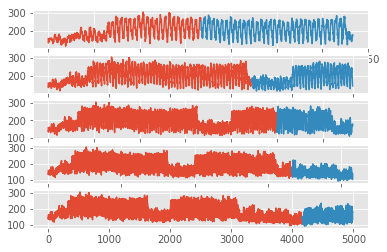

In [13]:
# experimenting with sklearn TimeSeriesSplit class
from sklearn.model_selection import TimeSeriesSplit

cluster = energy['Berkeley']+energy['Hopper']

X = cluster.values
splits = TimeSeriesSplit(n_splits=5)
plt.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(510 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()